# chapter 2 자연어 처리 개발 준비

*** 1장은 파이썬 설치와 관련된 사항이기때문에 넘어가고 2장부터 시작해보자.***  
  
2번째 part 시작!

# 3. 자연어 토크나이징 도구

자연어 처리를 하기 위해서는 우선 텍스트에 대한 정보를 단위별로 나누는 것이 일반적이다. 예를 들어 영화리뷰를 예측한다면 문장을 단어단위로 쪼개서 분석할수 있다. 이처럼 예측해야할 입력정보를 하나의 특정기본단위로 자르는것을 토크나이징이라고 한다. 

### 영어 토크나이징 라이브러리

#### NLTK
대표적인 라이브러리가 nltk가 있다. 50개가 넘는 말뭉치 리소스를 활용해 영어텍스트를 분석할수잇도록 제공한다.

```shell
conda install nltk
```
해당 명령어로 설치한다.

그리고 nltk는 자체 말뭉치를 제공하므로 이걸 사용하려면 다운로드해야한다. 
```python3
import nltk
nltk.download()
```

In [7]:
# conda install nltk -y

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 토크나이징
파이썬은 split을 통해 나눌수도 있지만 라이브러리를 사용하면 훨씬더 간편하고 효과적으로 토크나이징할수 있다.  
단어단위 토크나이징은 word_tokenize를 불러와 사용하면 되고, 문장 단위 토크나이징은 sent_tokenize 를 사용하면 된다.

In [8]:
from nltk.tokenize  import word_tokenize
from nltk.tokenize  import sent_tokenize

sentence='Natural language processing (NLP) is a subfield of computer science, information engineering, and artificail intelligences, corcerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.'
print(word_tokenize(sentence))

paragraph='Natural language processing (NLP) is a subfield of computer science, information enginerring, and artificial intelligence concerned with the interactions between computers and human (naruarl) languages, in particular how to program computers to precess and analyzer large amounts of natural langauge data. Challenges in narural language processing frequently involve sppech recognition, natural language understanding, and natural language generation.'
print(sent_tokenize(paragraph))


['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificail', 'intelligences', ',', 'corcerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information enginerring, and artificial intelligence concerned with the interactions between computers and human (naruarl) languages, in particular how to program computers to precess and analyzer large amounts of natural langauge data.', 'Challenges in narural language processing frequently involve sppech recognition, natural language understanding, and natural language generation.']


이밖에도 nltk는 다양한 기능을 제공하고 있으므로 찾아서 사용해보자.

그리고 다음으로 Spacy에 대해서 알아보자.
### Spacy

상업용 목적으로 만들어 졌다는 점에서 nltk와는 다르다. 영어 뿐 아니라 8개국의 자연어 전처리모듈을 제공하고있다. 또 딥러닝 언어모델의 개발도 지원하고 있어 매력적이다. [공식문서](https://spacy.io/usage/training)를 통해서 자세한 내용을 확인해보자.

```shell
conda install spacy
python -m spacy download en
```
전처리를 하기 위해서는 해당 언어 데이터를 받아야한다.   

spacy를 사용하여 토크나이징을 해보자

In [1]:
# !conda install spacy -y
# !python -m spacy download en
import spacy

nlp = spacy.load('en')
sentence='Natural language processing (NLP) is a subfield of computer science, information engineering, and artificail intelligences, corcerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.'

doc = nlp(sentence)

word_tokenized_sentence = [token.text for token in doc]
sentence_tokenized_list = [sent.text for sent in doc.sents]
print(word_tokenized_sentence)
print(sentence_tokenized_list)

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificail', 'intelligences', ',', 'corcerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.']
['Natural language processing (NLP) is a subfield of computer science, information engineering, and artificail intelligences, corcerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.']


nltk와 spacy는 한글 토크나이징을 할수 없다. 그러면 한국어 토크나이징은 어떻게 해야할까?
살펴보자

### 한글 토크나이징 라이브러리

#### KoNLPy
KoNLPy는 국내에서 이미 만들어져 사용되고 있는 여러 형태소분석기를 사용할수 있게 허용한다. 여기서는 형태소 단위의 토크나이징을 알아보자. 먼저 java가 설치되어있어야한다. 그리고 jPype1 0.57 이상 버전이 설치되어있어야한다.

자바는 오라클에서 설치하면 되고 JPype1은 아래 처럼
```shell
pip install JPype1-0.6.2-cp36-cp36m-win_amd64.whl
```
이렇게 설치해주면 된다.  
  
  
한글 텍스트의 경우에는 형태소 단위 토크나이징이 필요할 때가 있다. KoNLPy에서는 여러 형태소 분석기를 제공하며, 각 형태소 분석기별로 분석한 결과는 다를 수 있다. 각 형태소 분석기는 클래스형태도 되어있고 개체로 생성한 후 메서드를 호출해서 토크나이징 할수 있다. 종류에는 

- Hannanum
- Kkma
- Komoran
- Mecab
- Okt

이중 Okt로 예를 들어보자

Okt는 4개의 함수를 제공한다.
- morphs()
    > 텍스트를 형태소 단위로 나눈다. 옵션으로 norm, stem 이 있는데 True, False를 받는다.
    > norm은 normalize의 약자로써 문장을 정규화 하는 역할을 하고, stem 은 어간을 추출하는 기능이다. 기본값은 False이다.
- nouns()
    > 텍스트에서 명사만 뽑아낸다.
- phrases()
    > 텍스트에서 어절을 뽑아낸다.
- pos()
    > pos는 품사를 태깅하는 역할을 한다. 품사를 태깅한다는 것은 주어진 텍스트를 형태소단위로 나누고 나눠진 각 형태소를 그에 해당하는 품사와 함께 리스트화 하는 것을 의미한다. morphs와 마찬가지고 norm, stem 옵션이있고 추가적으로 join이 있는데 True로 하게되면 형태소와 품사를 '형태소/품사' 형태로 붙여서 출력한다.


In [1]:
# !pip install konlpy
from konlpy.tag import Okt

okt = Okt()
text="한글 자연어 처리는 재밌다. 이제부터 열심히 해야지 ㅎㅎㅎ"

print(okt.morphs(text))
print(okt.morphs(text,stem=True))

['한글', '자연어', '처리', '는', '재밌다', '.', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '.', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [3]:
print(okt.phrases(text))
print(okt.nouns(text))
print(okt.pos(text))
print(okt.pos(text, join=True))

['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
['한글', '자연어', '처리', '이제']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('.', 'Punctuation'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', './Punctuation', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


------------------------------------

KoNLPy가 제공해주는 데이터도 있다. 
- kolaw 
    > 한국 법률 말뭉치
- kobill
    > 대한민국 국회 의안 말뭉치. id값으로 1809890.txt ~ 1809899.txt 까지 구성되어있음.

In [8]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

print(kolaw.open('constitution.txt').read()[:20])
print('--------------------------------------------')
print(kobill.open('1809890.txt').read()[:20])

대한민국헌법

유구한 역사와 전통에 
--------------------------------------------
지방공무원법 일부개정법률안

(정의화


# 4. 그밖의 라이브러리

마지막으로 볼 라이브러리들은 numpy, pandas, matplotlib, re, beautifulsoup까지 살펴보자.

## numpy
빠르고 효율적인 계산을 위해 만들어진 파이썬 라이브러리이다. numpy는 고성능의 다차원 배열 객체와 이러한 배열을 계산할 효율적인 도구를 제공한다. 핵심은 ndarray 객체이다. 동일한 자료형을 가진 n차 배열로 저 덕은 코드로 연산이 가능하고 빠르게 결과를 얻을수 있다.

```shell
conda install numpy
```
로 간단하게 설치할수 있다.  

numpy로 실습해보자

In [10]:
import numpy as np

a = np.array([[1,2,3],[1,5,9],[3,5,7]])

print(a.ndim)  # 차원의 수를 반환한다.
print(a.shape)  # 배열의 형태를 반환한다. 2*3 이라면 (2,3) 형태로 반환함
print(a.size)   # 원소의 총개수
print(a.dtype)  # 원소들의 자료형

2
(3, 3)
9
int64


In [24]:
a = np.zeros((2,4))  # 2,4 형태의 0인 배열이 생김.
print(a)
b = np.ones((3,2))   # 3,2 형태의 1인 배열이 생김
print(b)
c = np.empty((2,2))  # 원소값을 초기화하지 않은 배열 생성
print(c)
d = np.arange(10,30,5) # 10 부터 30까지 5단위의 배열 생성
print(d)
e= np.full((2,2),4)  # 2,2 배열을 4로 채운 배열 생성
print(e)
f = np.eye(3)     # 3,3의 단위행렬이 생김.
print(f)
g = np.random.random((2,2))  # 임의의 값으로 2,2 배열을 채움.
print(g)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[1. 1.]
 [1. 1.]
 [1. 1.]]
[[0.41691941 0.45870218]
 [0.79274789 0.99653963]]
[10 15 20 25]
[[4 4]
 [4 4]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.81160886 0.0479222 ]
 [0.27604372 0.01028113]]


In [27]:
# numpy 기본연산
a=np.array([1,2,3])
b=np.array([4,5,6])

print('a+b',a+b)
print('np.add(a,b)',np.add(a,b))
print('b-a',b-a)
print('np.substract(b,a)',np.subtract(b,a))
print('a**2',a**2)
print('b<5',b<5)

a+b [5 7 9]
np.add(a,b) [5 7 9]
b-a [3 3 3]
np.substract(b,a) [3 3 3]
a**2 [1 4 9]
b<5 [ True False False]


In [32]:
c = np.array([[1,2],[3,4]])
d = np.array([[10,20],[30,12]])

print('c*d',c*d)                 # 원소별 곱셈
print('np.dot(c,d)',np.dot(c,d))  # 내적
print('c.dot(d)',c.dot(d))        # 내적

c*d [[10 40]
 [90 48]]
np.dot(c,d) [[ 70  44]
 [150 108]]
c.dot(d) [[ 70  44]
 [150 108]]


In [30]:
# axis를 기준으로 한 연산
a = np.array([[2,5,4,7],[1,7,8,4],[2,3,9,6]])
print(a.sum(axis=0))  # 열을 기준으로 더함. 그래서 4개가 나옴
print(a.sum(axis=1))  # 행을 기준으로 더함. 그래서 3개가 나옴
print(a.max(axis=0))  # 열을 기준으로 최대값
print(a.max(axis=1)) # 행을 기준으로 최대값

[ 5 15 21 17]
[18 20 20]
[2 7 9 7]
[7 8 9]


In [35]:
# 슬라이싱, 인덱싱
a = np.array([2,5,4,71,7,8,42,3,9,6])
b = np.array([[2,5,4,7],[1,7,8,4],[2,3,9,6]])

print(a[3])
print(a[-1])
print(a[2:5])
print(a[2:])
print(a[:4])

print(b[:,1])
print(b[-1])

71
6
[ 4 71  7]
[ 4 71  7  8 42  3  9  6]
[ 2  5  4 71]
[5 7 3]
[2 3 9 6]


In [36]:
# 형태변환
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

print(a.ravel())           # 1차원 벡터로 변환
print(a.reshape(2,6))      #  2,6 배열로 변환
print(a.T)                 # 트랜스포스 된 행렬로 변환

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [39]:
# 브로드캐스팅 (형태가 달라도 연산이 가능함.)
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,0,1])

y = np.empty_like(a)

for i in range(3):
    y[i,:]= a[i,:]+b
print(y)
# 위와같은 연산은 크기가 커지면 속도가 느려질수있다.

c = a+ b
print(c)
# 연산도 줄고 속도나 코드작성에서도 이로움이 있다.

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


## pandas 사용법

설치는 
```shell
conda install pandas
```
사용하는 법은 
```python3
import pandas as pd
```
와 같이 하면 된다.

3가지의 데이터구조가 있는데 
- Series
    + 1차원 배열의 형태
- DataFrame
    + 2차원 데이터 구조
- Panel
    + 3차원 데이터.  

패널에 대한 자세한 설명은 [판다스 공식 문서](http://pandas.pydata.org/pandas-docs/stable)를 확인하자

### Series
`pandas.Series(data, index, dtype, copy)` 와 같이 만들 수 있다.



In [48]:
import pandas as pd
import numpy as np

a = pd.Series([6,7,3,8,1])
print(a)

data= np.array(['b','t','q','v'])
b= pd.Series(data)
print(b)

c=pd.Series(np.arange(10,30,5))
print(c)

d=pd.Series(['b','r','w'],index=[10,20,30])  # index 설정가능
print(d)

e=pd.Series({'100':'q','200':'v','300':'b'}) # dict 타입으로 인덱스 설정가능.
print(e)

0    6
1    7
2    3
3    8
4    1
dtype: int64
0    b
1    t
2    q
3    v
dtype: object
0    10
1    15
2    20
3    25
dtype: int64
10    b
20    r
30    w
dtype: object
100    q
200    v
300    b
dtype: object


### DataFrame 

데이터프레임은 2차원 데이터.
```python3
pandas.DataFrame(data, index, columns, dtype, copy)
```

data 외엔 생략이 가능하다. 아래에서 실습을 해보자.

In [50]:
a= pd.DataFrame([1,5,7,9])
print(a)

dic = {'Name':['Cho','Kim','Lee'], 'Age':[28,31,27]}
b = pd.DataFrame(dic)
print(b)

c = pd.DataFrame([['apple',3000],['banana',5000],['orange',4500]])
print(c)

   0
0  1
1  5
2  7
3  9
  Name  Age
0  Cho   28
1  Kim   31
2  Lee   27
        0     1
0   apple  3000
1  banana  5000
2  orange  4500


### 판다스 데이터불러오기, 쓰기

```python3
pandas.read_csv('file_path')
```
이처럼 csv 파일을 읽어올수 있다. 이걸로 DataFrame을 만들어 데이터를 가공할수 있다.  
그럼 어떻게 다루는지 보자.

In [ ]:
df = pd.read_csv('file_path')

print(df['A'])

print(df['A'][:3])

df['D'] = df['A'] + df['B']  # a 열과 b 열을 더해서 D 열을 만듬. 숫자만 가능.
print(df['D'])

# 이외에도 드랍이라든지 다룰 부분이 많음.

### Matplotlib

시각화를 위한 라이브러리.

```shell
conda install matplotlib
```
이처럼 설치할수있다.
그럼 바로 실습하자.

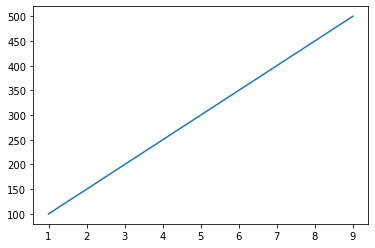

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x=[1,3,5,7,9]
y=[100,200,300,400,500]
plt.plot(x,y)

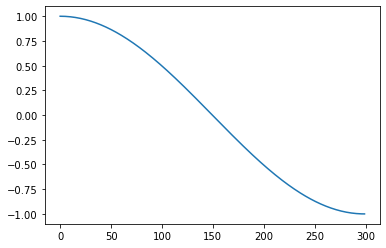

In [68]:
# cosine 함수그리기
# x=np.linspace(-np.pi, np.pi, 128)
x=np.linspace(0, np.pi, 300)
y=np.cos(x)
plt.plot(y)

## re (정규 표현식)

파이썬에 내장라이브러리인 re 를 알아보자


|표현식|설명|
|---|:---:|
|.|줄바꿈을 제외한 모든 문자|
|^|문자열의 시작|
|$|문자열의 끝|
|*|앞에 있는 문자가 0회 이상 반복된 문자열|
|+|앞에 있는 문자가 1회 이상 반복된 문자열|
|{m}|앞 문자를 m번 반복하는 문자열|
|{n,m}|앞 문자를 n번 이상 m번 이하 반복하는 문자열|
|?|앞 문자가 나오지 않거나 나오는 문자열 ({0,1} 과 같은 표현)|
|\d|숫자|
|\D|숫자 아닌 문자|
|\w|문자 혹은 숫자|
|\W|문자 혹은 숫자가 아닌것|
|(...)|괄호안의 모든 전규표현식을 만족하는 문자|
|[abc]|a,b,c 중에 한개와 일치하는 문자|


사용법은 아래에서 살펴보자

In [104]:
import re

pattern='\w+'
re_pattern = re.compile(pattern) # 컴파일 해두면 필요할때마다 사용할수있음.
print(re_pattern.match("문자열이나 숫자인 경우만 생성되지요.& 13\n")) # match 되는게 없다면 None

print(re.search('\W','.특수문자가 있으면 생성'))

print(re.split('\W','.특수문자가, 있으면, 자름'))

print(re.sub('\W', '', '.특수문자나 띄어쓰기, 있으면, 공백으로 만듦.'))

<re.Match object; span=(0, 5), match='문자열이나'>
<re.Match object; span=(0, 1), match='.'>
['', '특수문자가', '', '있으면', '', '자름']
특수문자나띄어쓰기있으면공백으로만듦


## beautiful soup 사용
beuatiful soup은 웹에있는 html 문서를 파싱할수 있다. 구체적인 내용은 [공식문서](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)를 확인하자

# 캐글 사용법

캐글을 데이터를 제공해줄 뿐 아니라 여러사람과 경쟁해볼수도 있고 모델을 비교해보며 공부할수 있다는 점이 매력적이다. 자연어처리 분야또 한 마찬가지다. 캐글에는 많은 자연어처리가 있으므로 공부해보자.
[캐글 홈페이지](https://www.kaggle.com)에 들어가보자


캐글을 파이썬에서도 사용할수있으니 관련 api 사용하기 위해 설치해보자
```shell
conda install kaggle
```
설치되었다면 계정과 연동해야함. 캐글 홈페이지에서 가입하고 Account 탭으로 가서 Create API Token을 선택하고 kaggel.json 파일을 내려받는다. 이 파일에는 본인의 인증서가 들어있다. 내려받은 파일은 아래의 위치에 가져다 놓는다.
```
C:\User\<UserName>\.kaggle   # 윈도우
/home/<UserName>/.kaggle     # 리눅스 or Mac
```

이제 데이터를 받는 방법은 Data 탭에 들어가서 API의 명령어를 복사한후 커맨드창에 입력하면 된다.
자세한건 [캐글문서](https://github.com/Kaggle/kaggle-api)를 확인하자.
```shell
$ kaggle competitions download -c <competition-name>  // 다운로드
$ kaggle competitions files -c <competition-name>     // 데이터 목록 확인
$ kaggle competitions submit <competition-name> -f <file-name> -m <message>    // 데이터 제출
$ kaggle competitions list                            // 대회 목록 확인
```

등이 있다.

# 정리

길고 긴 2장을 마무리했다.  
여기 나온 예시들은 다 짧게만 살펴본것이기 때문에 더 봐야할것들이 많다.  
공식 문서를 자주 살피고 익숙해져서 상황에 따라 자유롭게 사용할수있도록 하자.